<a href="https://colab.research.google.com/github/Lilchoto3/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [190]:
# Start by grabbing my data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('https://raw.githubusercontent.com/Lilchoto3/lilchoto3.github.io/master/Destiny2.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Lilchoto3/lilchoto3.github.io/master/Destiny2_Worthy.csv')

train = train.drop(columns='Unnamed: 0')
test = test.drop(columns='Unnamed: 0')

# Does it look correct?
train.head()

,Name,Weapon Type,Archetype,Rarity,Optimal TTK,Bodyshot TTK,Usage,Impact,Range,Stability,Handling,Reload Speed,Rounds Per Minute,Magazine,Aim Assistance,Zoom,Recoil Direction,Blast Radius,Velocity,Charge Time,Accuracy,Draw Time,Swing Speed,Efficiency,Defense,Ammo Capacity,Perk 1 Init,Perk 1 Rolls Hash,Perk 1 Rolls,Perk 1 is Intrinsic,Perk 2 Init,Perk 2 Rolls Hash,Perk 2 Rolls,Perk 2 is Intrinsic,Perk 3 Init,Perk 3 Rolls Hash,Perk 3 Rolls,Perk 3 is Intrinsic,Perk 4 Init,Perk 4 Rolls Hash,Perk 4 Rolls,Perk 4 is Intrinsic
0,Tango-45 XK5094,Scout Rifle,Precision Frame,Legendary,1.00,1.67,NaN,62.0,50.0,50.0,45.0,44.0,180.0,16.0,65.0,20.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SLO-12 Post,1.021765e+08,"['SRO-37 Ocular', 'SRO-41 Ocular', 'SRO-52 Ocu...",False,Alloy Magazine,3.964805e+09,"['Accurized Rounds', 'Drop Mag', 'Appended Mag...",False,Triple Tap,2.338289e+09,"['Hip-Fire Grip', 'Grave Robber', 'Auto-Loadin...",False,NaN,3.031173e+09,"['Explosive Payload', 'Rangefinder', 'Genesis'...",False
1,Ancient Gospel,Hand Cannon,Adaptive Frame,Legendary,0.87,1.73,NaN,84.0,47.0,62.0,51.0,49.0,140.0,10.0,74.0,14.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.958784e+08,"['Arrowhead Brake', 'Chambered Compensator', '...",False,NaN,9.247514e+08,"['Accurized Rounds', 'Drop Mag', 'Tactical Mag...",False,NaN,3.033335e+09,"['Rapid Hit', 'Slideshot', 'Eye of the Storm',...",False,NaN,3.445907e+09,"['Kill Clip', 'Rangefinder', 'Dragonfly', 'Swa...",False
2,Good Bone Structure,Shotgun,Precision Frame,Legendary,0.00,0.93,NaN,70.0,60.0,50.0,69.0,46.0,65.0,6.0,35.0,12.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.958784e+08,"['Arrowhead Brake', 'Chambered Compensator', '...",False,Extended Mag,2.070940e+09,"['Assault Mag', 'Appended Mag', 'Tactical Mag'...",False,Outlaw,1.712792e+09,"['Outlaw', 'Threat Detector', 'Field Prep', 'F...",False,NaN,3.247925e+09,"['Rampage', 'Triple Tap', 'Snapshot Sights', '...",False
3,Avalanche,Machine Gun,Adaptive Frame,Legendary,0.53,0.80,NaN,41.0,55.0,46.0,34.0,60.0,450.0,57.0,90.0,15.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SLO-12 Post,2.159586e+09,"['SRO-37 Ocular', 'SRO-41 Ocular', 'SLO-12 Pos...",False,Alloy Magazine,6.412065e+08,"['Extended Mag', 'Alloy Magazine', 'Appended M...",False,Under Pressure,3.640104e+09,"['Under Pressure', 'Dynamic Sway Reduction', '...",False,Rampage,1.662011e+09,"['Rampage', 'High-Impact Reserves', 'Quickdraw...",False
4,Drang (Baroque),Sidearm,Together Forever,Legendary,0.60,1.00,0.183,49.0,42.0,64.0,74.0,37.0,300.0,18.0,70.0,14.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Bore,2.958784e+08,"['Arrowhead Brake', 'Chambered Compensator', '...",False,Accurized Rounds,6.412065e+08,"['Extended Mag', 'Alloy Magazine', 'Appended M...",False,Quickdraw,4.059394e+09,"['Quickdraw', 'Disruption Break', 'Full Auto T...",False,Rampage,9.661714e+08,"['Rampage', 'Shield Disorient', 'Swashbuckler'...",False


In [191]:
test.tail()

,Name,Weapon Type,Archetype,Rarity,Optimal TTK,Bodyshot TTK,Usage,Impact,Range,Stability,Handling,Reload Speed,Rounds Per Minute,Magazine,Aim Assistance,Zoom,Recoil Direction,Blast Radius,Velocity,Charge Time,Swing Speed,Guard Efficiency,Guard Resistance,Ammo Capacity,Perk 1 Init,Perk 1 Rolls Hash,Perk 1 Rolls,Perk 1 is Intrinsic,Perk 2 Init,Perk 2 Rolls Hash,Perk 2 Rolls,Perk 2 is Intrinsic,Perk 3 Init,Perk 3 Rolls Hash,Perk 3 Rolls,Perk 3 is Intrinsic,Perk 4 Init,Perk 4 Rolls Hash,Perk 4 Rolls,Perk 4 is Intrinsic
16,Interference VI,Grenade Launcher,Adaptive Frame,Legendary,0.0,0.5,0.134,NaN,NaN,44.0,46.0,46.0,120.0,6,61.0,13,66.0,30.0,36.0,NaN,NaN,NaN,NaN,NaN,Volatile Launch,3664361537,"['Volatile Launch', 'Confined Launch', 'Counte...",False,Alloy Casing,1820431466,"['Thermoplastic Grenades', 'Proximity Grenades...",False,Field Prep,1792685204,"['Field Prep', 'Auto-Loading Holster', 'Clown ...",False,NaN,1273570076,"['Full Court', 'Demolitionist', 'Swashbuckler'...",False
17,Tomorrow's Answer,Rocket Launcher,High-Impact Frame,Legendary,0.0,0.0,0.422,NaN,NaN,64.0,70.0,42.0,15.0,1,73.0,20,55.0,95.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,3664361537,"['Volatile Launch', 'Confined Launch', 'Counte...",False,NaN,929622943,"['Alloy Casing', 'Black Powder', 'High-Velocit...",False,NaN,3914987126,"['Underdog', 'Moving Target', 'Genesis', 'Rang...",False,NaN,1909581762,"['Disruption Break', 'Snapshot Sights', 'Shiel...",False
18,Honor's Edge,Sword,Adaptive Frame,Legendary,0.0,0.0,0.021,60.0,40.0,NaN,NaN,NaN,NaN,60,NaN,0,NaN,NaN,NaN,20.0,46.0,10.0,60.0,62.0,Tempered Edge,4067575027,"['Hungry Edge', 'Enduring Blade', 'Honed Edge'...",False,Burst Guard,1121748741,"['Balanced Guard', 'Burst Guard', 'Enduring Gu...",False,En Garde,662567192,"['Tireless Blade', 'Relentless Strikes', 'Ener...",False,NaN,1614414416,"['Flash Counter', 'Shattering Blade', 'En Gard...",False
19,The Scholar,Scout Rifle,High-Impact Frame,Legendary,0.8,2.0,0.362,67.0,69.0,29.0,37.0,38.0,150.0,13,32.0,21,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295878355,"['Arrowhead Brake', 'Chambered Compensator', '...",False,NaN,641206481,"['Extended Mag', 'Alloy Magazine', 'Appended M...",False,NaN,4015144620,"['Underdog', 'Opening Shot', 'Full Auto Trigge...",False,NaN,440796132,"['No Distractions', 'Vorpal Weapon', 'Elementa...",False
20,Astral Horizon,Shotgun,Aggressive Frame,Legendary,0.0,1.1,NaN,80.0,32.0,34.0,35.0,40.0,55.0,4,34.0,12,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1571809010,"['Rifled Barrel', 'Smoothbore', 'Smallbore', '...",False,NaN,2070940234,"['Assault Mag', 'Appended Mag', 'Tactical Mag'...",False,NaN,1186633387,"['Slideshot', 'Field Prep', 'Auto-Loading Hols...",False,NaN,334979453,"['Elemental Capacitor', 'Celerity', 'Swashbuck...",False


In [0]:
# Yeah, that looks good.

# Background for the data:
# The data is statistical information about various weapons in the game Destiny 2.
# The training data was mainly collected from 2/28/2020 to 3/1/2020, from sources
# such as the game's manifest, as well as player-versus-player (PvP) time-to-kill
# stats from a player-made spreadsheet, and player-versus-player usage statistics
# from the website destinytracker.com. The training data only encompasses data
# for weapons which weren't introduced in Season of the Worthy
#
# Likewise, the test data comes from the same sources, but was collected on 3/23/2020,
# after a major update which saw the release of approximately twenty-five new weapons,
# as well as a few changes to various weapon damages. The test data only contains
# data on weapons introduced in season of the worthy

# My target will be 'Usage' which is what percentage of players in PvP gamemodes
# are using that weapon, with my aim being to create a model which can predict
# that percentage, and by extention, the weapon's popularity

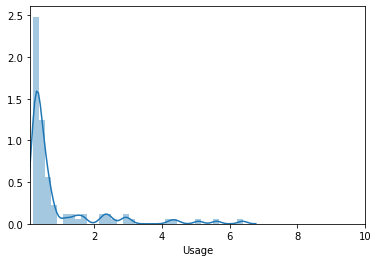

In [193]:
# Training data target distribution
import seaborn as sns

ax = sns.distplot(train['Usage'])
ax.set_xlim([.1,10])
plt.show()

# The targets seem to be distributed more towards zero, so I might need to log
# transform the targets.

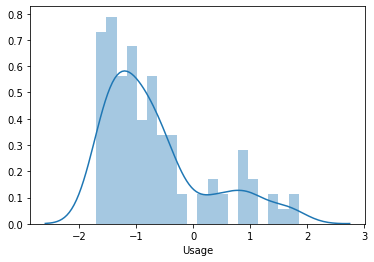

In [194]:
log_usages = train['Usage'].apply(np.log)
ax = sns.distplot(log_usages, bins=20)
plt.show()

# That looks a bit better; still skewed, but better

In [0]:
# Add the transformed usage stats to each dataframe,
# but don't override the originals

train['Usage__Log'] = train['Usage'].apply(np.log)
test['Usage__Log'] = test['Usage'].apply(np.log)

# create baseline check (bc) dataframes for training and testing data
# and then impute missing values
bc_train = train[['Usage']]
bc_test = test[['Usage']]

# fill missing usage data with a value of 0.05, as this value is a good
# average for miscellanious weapons which weren't on the top 100
bc_train = bc_train.fillna(value=0.05)
# fill missing testing usage data with a value of 0, as these weapons haven't
# been made available in-game yet
bc_test = bc_test.fillna(value=0)

bc_train['Usage__Log'] = bc_train['Usage'].apply(np.log)
bc_test['Usage__Log'] = bc_test['Usage'].apply(np.log)

In [196]:
# Baseline test: what's the mean Usage and Log Usage?
print('Baseline Mean:',train['Usage'].mean())
print('Baseline Log Mean:',train['Usage__Log'].mean())

Baseline Mean: 0.8636199999999999
Baseline Log Mean: -0.6723421093764119


In [197]:
# What's the MAE, and R^2 score for the baselines?
from sklearn.metrics import mean_absolute_error, r2_score
print('Baseline MAE:',mean_absolute_error(bc_train['Usage'], [bc_train['Usage'].mean() for x in bc_train['Usage']]))
print('Log Baseline MAE:',mean_absolute_error(bc_train['Usage__Log'], [bc_train['Usage__Log'].mean() for x in bc_train['Usage__Log']]))
print('Baseline R^2 score:',r2_score(bc_train['Usage'], [bc_train['Usage'].mean() for x in bc_train['Usage']]))
print('Log Baseline R^2 score:',r2_score(bc_train['Usage__Log'], [bc_train['Usage__Log'].mean() for x in bc_train['Usage__Log']]))

Baseline MAE: 0.2595734284454512
Log Baseline MAE: 0.7390476397768057
Baseline R^2 score: 0.0
Log Baseline R^2 score: 0.0


In [198]:
# Yeah, so basically, it's not a great baseline
# Also, I plan to use mean absolute error and r^2 score for my evaluation metrics,
# and I'm not going to remove any outliers, because they are important to show
# the most important weapons.

# One thing I'll have to do is split up the data by weapon type,
# since different weapon types have differences in their stats and archetypes.
# For example: both Auto Rifles and Sniper Rifles can have the archetype of
# 'Rapid-Fire Frame', yet these are wildly different weapons, even though they have
# the same archetype. Likewise, while weapons like Auto Rifles have stats for things like
# Impact, Stability, Range, and so on, weapons like Swords have stats like
# Swing Speed, Guard Efficiency, Guard Resistance, and so forth.
# And as such, comparing the two would be meaningless, since they are so different in
# function.

# I don't think I'll need to create a validation subsection of my training data
# since I plan to do a RandomizedSearchCV. That and I don't have a lot of data to begin with.

# Other than that, all I really need to do is clean my data up a bit
# I'm gonna start by first removing a bunch of data which means nothing statistically
bad_data = [x for x in train.columns if 'Hash' in x or 'Intrinsic' in x or 'Perk 1' in x or 'Perk 2' in x]
bad_data

['Perk 1 Init',
 'Perk 1 Rolls Hash',
 'Perk 1 Rolls',
 'Perk 1 is Intrinsic',
 'Perk 2 Init',
 'Perk 2 Rolls Hash',
 'Perk 2 Rolls',
 'Perk 2 is Intrinsic',
 'Perk 3 Rolls Hash',
 'Perk 3 is Intrinsic',
 'Perk 4 Rolls Hash',
 'Perk 4 is Intrinsic']

In [199]:
train = train.drop(columns=bad_data)
test = test.drop(columns=bad_data)

train.head()

,Name,Weapon Type,Archetype,Rarity,Optimal TTK,Bodyshot TTK,Usage,Impact,Range,Stability,Handling,Reload Speed,Rounds Per Minute,Magazine,Aim Assistance,Zoom,Recoil Direction,Blast Radius,Velocity,Charge Time,Accuracy,Draw Time,Swing Speed,Efficiency,Defense,Ammo Capacity,Perk 3 Init,Perk 3 Rolls,Perk 4 Init,Perk 4 Rolls,Usage__Log
0,Tango-45 XK5094,Scout Rifle,Precision Frame,Legendary,1.00,1.67,NaN,62.0,50.0,50.0,45.0,44.0,180.0,16.0,65.0,20.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Triple Tap,"['Hip-Fire Grip', 'Grave Robber', 'Auto-Loadin...",NaN,"['Explosive Payload', 'Rangefinder', 'Genesis'...",NaN
1,Ancient Gospel,Hand Cannon,Adaptive Frame,Legendary,0.87,1.73,NaN,84.0,47.0,62.0,51.0,49.0,140.0,10.0,74.0,14.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Rapid Hit', 'Slideshot', 'Eye of the Storm',...",NaN,"['Kill Clip', 'Rangefinder', 'Dragonfly', 'Swa...",NaN
2,Good Bone Structure,Shotgun,Precision Frame,Legendary,0.00,0.93,NaN,70.0,60.0,50.0,69.0,46.0,65.0,6.0,35.0,12.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outlaw,"['Outlaw', 'Threat Detector', 'Field Prep', 'F...",NaN,"['Rampage', 'Triple Tap', 'Snapshot Sights', '...",NaN
3,Avalanche,Machine Gun,Adaptive Frame,Legendary,0.53,0.80,NaN,41.0,55.0,46.0,34.0,60.0,450.0,57.0,90.0,15.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Under Pressure,"['Under Pressure', 'Dynamic Sway Reduction', '...",Rampage,"['Rampage', 'High-Impact Reserves', 'Quickdraw...",NaN
4,Drang (Baroque),Sidearm,Together Forever,Legendary,0.60,1.00,0.183,49.0,42.0,64.0,74.0,37.0,300.0,18.0,70.0,14.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Quickdraw,"['Quickdraw', 'Disruption Break', 'Full Auto T...",Rampage,"['Rampage', 'Shield Disorient', 'Swashbuckler'...",-1.698269


In [200]:
test.head()

,Name,Weapon Type,Archetype,Rarity,Optimal TTK,Bodyshot TTK,Usage,Impact,Range,Stability,Handling,Reload Speed,Rounds Per Minute,Magazine,Aim Assistance,Zoom,Recoil Direction,Blast Radius,Velocity,Charge Time,Swing Speed,Guard Efficiency,Guard Resistance,Ammo Capacity,Perk 3 Init,Perk 3 Rolls,Perk 4 Init,Perk 4 Rolls,Usage__Log
0,Seventh Seraph VY-7,Submachine Gun,Precision Frame,Legendary,0.80,1.10,0.006,25.0,59.0,48.0,28.0,27.0,600.0,27,57.0,13,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ambitious Assassin,"['Ambitious Assassin', 'Firmly Planted', ""Four...",Elemental Capacitor,"['Dragonfly', 'Feeding Frenzy', 'Vorpal Weapon...",-5.115996
1,Seventh Seraph Officer Revolver,Hand Cannon,Precision Frame,Legendary,1.00,1.67,NaN,78.0,35.0,57.0,37.0,54.0,180.0,9,68.0,14,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Firmly Planted', 'Pulse Monitor', 'Underdog'...",NaN,"['Feeding Frenzy', 'Vorpal Weapon', 'Osmosis',...",NaN
2,Seventh Seraph Carbine,Auto Rifle,Precision Frame,Legendary,0.93,1.47,0.097,29.0,62.0,45.0,45.0,47.0,450.0,34,34.0,16,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Hip-Fire Grip', 'Slideshot', ""Fourth Time's ...",NaN,"['Elemental Capacitor', 'Vorpal Weapon', 'Rang...",-2.333044
3,Seventh Seraph SAW,Machine Gun,High-Impact Frame,Legendary,0.50,0.83,NaN,70.0,66.0,30.0,35.0,38.0,360.0,43,30.0,16,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Grave Robber', 'Zen Moment', 'Clown Cartridg...",NaN,"['Vorpal Weapon', 'Opening Shot', 'Mulligan', ...",NaN
4,Seventh Seraph CQC-12,Shotgun,Lightweight Frame,Legendary,0.00,0.77,0.006,65.0,49.0,41.0,72.0,64.0,80.0,6,46.0,12,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lead from Gold,"['Lead from Gold', 'Auto-Loading Holster', 'Qu...",Shield Disorient,"['Vorpal Weapon', 'Shield Disorient', 'Snapsho...",-5.115996


In [201]:
# Okay, now I'm going to do something a bit crazy, but it will help greatly with
# modelling the data: I'm going to one-hot encode the lists in Perk Rolls 3 and 4.
# Perk Rolls 1 and 2 are only perks that affect stats, and are usually used to
# make random rolls of the same weapon feel like side-grades to each other, whereas
# Perks 3 and 4 are more impactful gameplay-wise and can even change the way players
# use the weapons, or even their playstyles.

# To do the one-hot encoding, I'll need to get a list of every perk in slots 3 and 4
# First, I wanna see if what I think are lists in Perk Rolls are actually lists
train['Perk 3 Rolls'][0][0]

'['

In [202]:
# Nope, that's a string, let's see if I can't fix that
def string_to_list(string_in):
  if isinstance(string_in, str):
    list_out = string_in.replace('[','').replace('"',"'").replace(']','').replace(',','').replace("' '","','").split(',')
    for i, string in enumerate(list_out):
      list_out[i] = string.strip("'")
    return list_out
  else:
    return np.NaN
    
train['Perk 3 Rolls'] = train['Perk 3 Rolls'].apply(string_to_list)
print(train['Perk 3 Rolls'][0])
print(train['Perk 3 Rolls'][0][0])

['Hip-Fire Grip', 'Grave Robber', 'Auto-Loading Holster', 'Zen Moment', 'Moving Target', 'Triple Tap', 'High-Impact Reserves']
Hip-Fire Grip


In [0]:
# There, that looks like it works, lets apply it to the other rolls columns and
# to the test data

train['Perk 4 Rolls'] = train['Perk 4 Rolls'].apply(string_to_list)
test['Perk 3 Rolls'] = test['Perk 3 Rolls'].apply(string_to_list)
test['Perk 4 Rolls'] = test['Perk 4 Rolls'].apply(string_to_list)

In [0]:
# Now I get get a list of all the unique perks in the game

# first though, I wanna check if something works
#train['Perk 3 Rolls'].unique()

In [205]:
# Darn, that doesn't work. I'll have to brute-force it somewhat then.
perklist = []
for i, perk in enumerate(train[['Perk 3 Init','Perk 3 Rolls','Perk 4 Init','Perk 4 Rolls']].values):
  # Check initial perks first
  if isinstance(perk[0], str):
    if perk[0] not in perklist:
      perklist.append(perk[0])
  if isinstance(perk[2], str):
    if perk[2] not in perklist:
      perklist.append(perk[2])
  # Now check the lists
  if isinstance(perk[1], list):
    for p in perk[1]:
      if p not in perklist:
        perklist.append(p)
  if isinstance(perk[3], list):
    for p in perk[3]:
      if p not in perklist:
        perklist.append(p)
for i, perk in enumerate(test[['Perk 3 Init','Perk 3 Rolls','Perk 4 Init','Perk 4 Rolls']].values):
  # Check initial perks first
  if isinstance(perk[0], str):
    if perk[0] not in perklist:
      perklist.append(perk[0])
  if isinstance(perk[2], str):
    if perk[2] not in perklist:
      perklist.append(perk[2])
  # Now check the lists
  if isinstance(perk[1], list):
    for p in perk[1]:
      if p not in perklist:
        perklist.append(p)
  if isinstance(perk[3], list):
    for p in perk[3]:
      if p not in perklist:
        perklist.append(p)

pd.options.display.max_rows = 160
perklist = pd.Series(perklist)
print(perklist.shape)
perklist

(157,)


0                    Triple Tap
1                 Hip-Fire Grip
2                  Grave Robber
3          Auto-Loading Holster
4                    Zen Moment
5                 Moving Target
6          High-Impact Reserves
7             Explosive Payload
8                   Rangefinder
9                       Genesis
10                 Opening Shot
11                       Outlaw
12                      Rampage
13                    Dragonfly
14                    Rapid Hit
15                    Slideshot
16             Eye of the Storm
17                    Kill Clip
18                 Swashbuckler
19              Threat Detector
20                   Field Prep
21     Full Auto Trigger System
22                Pulse Monitor
23                    Quickdraw
24              Snapshot Sights
25               Under Pressure
26       Dynamic Sway Reduction
27                    Slideways
28               Feeding Frenzy
29               Firmly Planted
30             Disruption Break
31      

In [206]:
# Looks pretty good, but I need to get rid of a few things
perklist = perklist.drop([69,70,72,83,84,85,86,87,88,89,90,91,93,94,100,102,104,109,114,116,128,147])

perklist = perklist.to_list()

perklist

['Triple Tap',
 'Hip-Fire Grip',
 'Grave Robber',
 'Auto-Loading Holster',
 'Zen Moment',
 'Moving Target',
 'High-Impact Reserves',
 'Explosive Payload',
 'Rangefinder',
 'Genesis',
 'Opening Shot',
 'Outlaw',
 'Rampage',
 'Dragonfly',
 'Rapid Hit',
 'Slideshot',
 'Eye of the Storm',
 'Kill Clip',
 'Swashbuckler',
 'Threat Detector',
 'Field Prep',
 'Full Auto Trigger System',
 'Pulse Monitor',
 'Quickdraw',
 'Snapshot Sights',
 'Under Pressure',
 'Dynamic Sway Reduction',
 'Slideways',
 'Feeding Frenzy',
 'Firmly Planted',
 'Disruption Break',
 'Shield Disorient',
 'Underdog',
 'Ambitious Assassin',
 'Tap the Trigger',
 'Mulligan',
 'Tracking Module',
 'Demolitionist',
 'Magnificent Howl',
 'Timed Payload',
 'Surrounded',
 'Headseeker',
 'Backup Plan',
 'Onslaught',
 'Subsistence',
 "Archer's Tempo",
 'Explosive Head',
 'Air Assault',
 'Sneak Bow',
 'Multikill Clip',
 'Shattering Blade',
 'Whirlwind Blade',
 'Relentless Strikes',
 'Tireless Blade',
 'Counterattack',
 'En Garde',
 "As

In [207]:
perklist.count('Kinetic Damage Mod')

0

In [208]:
# Awesome, looks like that's everything, now to create the encoded columns

# Create blank columns to start with
for perk in perklist:
  train['Rolls '+perk] = 0
  test['Rolls '+perk] = 0

train.head()

,Name,Weapon Type,Archetype,Rarity,Optimal TTK,Bodyshot TTK,Usage,Impact,Range,Stability,Handling,Reload Speed,Rounds Per Minute,Magazine,Aim Assistance,Zoom,Recoil Direction,Blast Radius,Velocity,Charge Time,Accuracy,Draw Time,Swing Speed,Efficiency,Defense,Ammo Capacity,Perk 3 Init,Perk 3 Rolls,Perk 4 Init,Perk 4 Rolls,Usage__Log,Rolls Triple Tap,Rolls Hip-Fire Grip,Rolls Grave Robber,Rolls Auto-Loading Holster,Rolls Zen Moment,Rolls Moving Target,Rolls High-Impact Reserves,Rolls Explosive Payload,Rolls Rangefinder,Rolls Genesis,Rolls Opening Shot,Rolls Outlaw,Rolls Rampage,Rolls Dragonfly,Rolls Rapid Hit,Rolls Slideshot,Rolls Eye of the Storm,Rolls Kill Clip,Rolls Swashbuckler,Rolls Threat Detector,Rolls Field Prep,Rolls Full Auto Trigger System,Rolls Pulse Monitor,Rolls Quickdraw,Rolls Snapshot Sights,Rolls Under Pressure,Rolls Dynamic Sway Reduction,Rolls Slideways,Rolls Feeding Frenzy,Rolls Firmly Planted,Rolls Disruption Break,Rolls Shield Disorient,Rolls Underdog,Rolls Ambitious Assassin,Rolls Tap the Trigger,Rolls Mulligan,Rolls Tracking Module,Rolls Demolitionist,Rolls Magnificent Howl,Rolls Timed Payload,Rolls Surrounded,Rolls Headseeker,Rolls Backup Plan,Rolls Onslaught,Rolls Subsistence,Rolls Archer's Tempo,Rolls Explosive Head,Rolls Air Assault,Rolls Sneak Bow,Rolls Multikill Clip,Rolls Shattering Blade,Rolls Whirlwind Blade,Rolls Relentless Strikes,Rolls Tireless Blade,Rolls Counterattack,Rolls En Garde,Rolls Assassin's Blade,Rolls Energy Transfer,Rolls Explosive Light,Rolls Reservoir Burst,Rolls Fourth Time's the Charm,Rolls Reversal of Fortune,Rolls Full Court,Rolls One-Two Punch,Rolls Osmosis,Rolls Overflow,Rolls Firing Line,Rolls Clown Cartridge,Rolls Box Breathing,Rolls Cluster Bomb,Rolls Desperado,Rolls Arc Damage Mod,Rolls Elemental Capacitor,Rolls Vorpal Weapon,Rolls Archer's Gambit,Rolls Killing Tally,Rolls No Distractions,Rolls Trench Barrel,Rolls Lead from Gold,Rolls Seraph Rounds,Rolls Together Forever,Rolls MIDA Synergy,Rolls Master of Arms,Rolls Meganeura,Rolls Micro-Missile,Rolls Flame Refraction,Rolls Taken Predator,Rolls Firefly,Rolls Parasitism,Rolls Broadhead,Rolls Business Time,Rolls MIDA Radar,Rolls Grenades and Horseshoes,Rolls Textured Grip,Rolls Longest Winter,Rolls Mechanized Autoloader,Rolls Spread Shot Package,Rolls Supercharged Battery,Rolls Unforeseen Repercussions,Rolls Dark Descent,Rolls Short-Action Stock,Rolls Vermin,Rolls Breakthrough,Rolls Leviathan's Sigh,Rolls Play with Your Prey,Rolls Spinning Up,Rolls Sun Blast,Rolls Storm and Stress,Rolls Superconductor,Rolls Bottomless Appetite,Rolls Ionic Return,Rolls Target Acquired,Rolls Lightning Rounds,Rolls Cruel Remedy,Rolls Release the Wolves,Rolls The Roadborn,Rolls Blessing of the Sky,Rolls Death at First Glance,Rolls Thin the Herd,Rolls The Scientific Method,Rolls Long March,Rolls Cosmology,Rolls Last Stand,Rolls Pyrogenesis,Rolls Serve the Colony,Rolls Soul Devourer,Rolls Dynamic Charge,Rolls Penance,Rolls Markov Chain,Rolls The Fundamentals,Rolls Impetus,Rolls For the Empire,Rolls Lightning Rod,Rolls Celerity,Rolls Flash Counter
0,Tango-45 XK5094,Scout Rifle,Precision Frame,Legendary,1.00,1.67,NaN,62.0,50.0,50.0,45.0,44.0,180.0,16.0,65.0,20.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Triple Tap,"[Hip-Fire Grip, Grave Robber, Auto-Loading Hol...",NaN,"[Explosive Payload, Rangefinder, Genesis, Open...",NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ancient Gospel,Hand Cannon,Adaptive Frame,Legendary,0.87,1.73,NaN,84.0,47.0,62.0,51.0,49.0,140.0,10.0,74.0,14.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Rapid Hit, Slideshot, Eye of the Storm, Outlaw]",NaN,"[Kill Clip, Rangefinder, Dragonfly, Swashbuckler]",NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [210]:
# Now to encode whether or not that weapon can roll those perks
def encode_perks(df):
  for i, weapon in enumerate(df.values):
    # How do I see which rolls the weapons have?
    #print(i,train['Perk 3 Rolls'][i])
    # That works, lets get the initial perks first
    if isinstance(df['Perk 3 Init'][i], str):
      if df['Perk 3 Init'][i] in perklist: # Check for bad perks
        df['Rolls '+df['Perk 3 Init'][i]][i] = 1
        #print(train['Rolls '+train['Perk 3 Init'][i]][i])
    if isinstance(df['Perk 4 Init'][i], str):
      if df['Perk 4 Init'][i] in perklist:
        df['Rolls '+df['Perk 4 Init'][i]][i] = 1
        #print(train['Rolls '+train['Perk 4 Init'][i]][i])
    # Now for the lists
    if isinstance(df['Perk 3 Rolls'][i], list):
      for perk in df['Perk 3 Rolls'][i]:
        if perk in perklist:
          df['Rolls '+perk][i] = 1
          #print(train['Rolls '+perk][i])
    if isinstance(df['Perk 4 Rolls'][i], list):
      for perk in df['Perk 4 Rolls'][i]:
        if perk in perklist:
          df['Rolls '+perk][i] = 1
          #print(train['Rolls '+perk][i])

encode_perks(train)
encode_perks(test)

pd.options.display.max_columns = 175
train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be

,Name,Weapon Type,Archetype,Rarity,Optimal TTK,Bodyshot TTK,Usage,Impact,Range,Stability,Handling,Reload Speed,Rounds Per Minute,Magazine,Aim Assistance,Zoom,Recoil Direction,Blast Radius,Velocity,Charge Time,Accuracy,Draw Time,Swing Speed,Efficiency,Defense,Ammo Capacity,Perk 3 Init,Perk 3 Rolls,Perk 4 Init,Perk 4 Rolls,Usage__Log,Rolls Triple Tap,Rolls Hip-Fire Grip,Rolls Grave Robber,Rolls Auto-Loading Holster,Rolls Zen Moment,Rolls Moving Target,Rolls High-Impact Reserves,Rolls Explosive Payload,Rolls Rangefinder,Rolls Genesis,Rolls Opening Shot,Rolls Outlaw,Rolls Rampage,Rolls Dragonfly,Rolls Rapid Hit,Rolls Slideshot,Rolls Eye of the Storm,Rolls Kill Clip,Rolls Swashbuckler,Rolls Threat Detector,Rolls Field Prep,Rolls Full Auto Trigger System,Rolls Pulse Monitor,Rolls Quickdraw,Rolls Snapshot Sights,Rolls Under Pressure,Rolls Dynamic Sway Reduction,Rolls Slideways,Rolls Feeding Frenzy,Rolls Firmly Planted,Rolls Disruption Break,Rolls Shield Disorient,Rolls Underdog,Rolls Ambitious Assassin,Rolls Tap the Trigger,Rolls Mulligan,Rolls Tracking Module,Rolls Demolitionist,Rolls Magnificent Howl,Rolls Timed Payload,Rolls Surrounded,Rolls Headseeker,Rolls Backup Plan,Rolls Onslaught,Rolls Subsistence,Rolls Archer's Tempo,Rolls Explosive Head,Rolls Air Assault,Rolls Sneak Bow,Rolls Multikill Clip,Rolls Shattering Blade,Rolls Whirlwind Blade,Rolls Relentless Strikes,Rolls Tireless Blade,Rolls Counterattack,Rolls En Garde,Rolls Assassin's Blade,Rolls Energy Transfer,Rolls Explosive Light,Rolls Reservoir Burst,Rolls Fourth Time's the Charm,Rolls Reversal of Fortune,Rolls Full Court,Rolls One-Two Punch,Rolls Osmosis,Rolls Overflow,Rolls Firing Line,Rolls Clown Cartridge,Rolls Box Breathing,Rolls Cluster Bomb,Rolls Desperado,Rolls Arc Damage Mod,Rolls Elemental Capacitor,Rolls Vorpal Weapon,Rolls Archer's Gambit,Rolls Killing Tally,Rolls No Distractions,Rolls Trench Barrel,Rolls Lead from Gold,Rolls Seraph Rounds,Rolls Together Forever,Rolls MIDA Synergy,Rolls Master of Arms,Rolls Meganeura,Rolls Micro-Missile,Rolls Flame Refraction,Rolls Taken Predator,Rolls Firefly,Rolls Parasitism,Rolls Broadhead,Rolls Business Time,Rolls MIDA Radar,Rolls Grenades and Horseshoes,Rolls Textured Grip,Rolls Longest Winter,Rolls Mechanized Autoloader,Rolls Spread Shot Package,Rolls Supercharged Battery,Rolls Unforeseen Repercussions,Rolls Dark Descent,Rolls Short-Action Stock,Rolls Vermin,Rolls Breakthrough,Rolls Leviathan's Sigh,Rolls Play with Your Prey,Rolls Spinning Up,Rolls Sun Blast,Rolls Storm and Stress,Rolls Superconductor,Rolls Bottomless Appetite,Rolls Ionic Return,Rolls Target Acquired,Rolls Lightning Rounds,Rolls Cruel Remedy,Rolls Release the Wolves,Rolls The Roadborn,Rolls Blessing of the Sky,Rolls Death at First Glance,Rolls Thin the Herd,Rolls The Scientific Method,Rolls Long March,Rolls Cosmology,Rolls Last Stand,Rolls Pyrogenesis,Rolls Serve the Colony,Rolls Soul Devourer,Rolls Dynamic Charge,Rolls Penance,Rolls Markov Chain,Rolls The Fundamentals,Rolls Impetus,Rolls For the Empire,Rolls Lightning Rod,Rolls Celerity,Rolls Flash Counter
0,Tango-45 XK5094,Scout Rifle,Precision Frame,Legendary,1.00,1.67,NaN,62.0,50.0,50.0,45.0,44.0,180.0,16.0,65.0,20.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Triple Tap,"[Hip-Fire Grip, Grave Robber, Auto-Loading Hol...",NaN,"[Explosive Payload, Rangefinder, Genesis, Open...",NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ancient Gospel,Hand Cannon,Adaptive Frame,Legendary,0.87,1.73,NaN,84.0,47.0,62.0,51.0,49.0,140.0,10.0,74.0,14.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Rapid Hit, Slideshot, Eye of the Storm, Outlaw]",NaN,"[Kill Clip, Rangefinder, Dragonfly, Swashbuckler]",NaN,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [211]:
# Okay, now to drop the init and rolls columns, since they're not needed anymore
train = train.drop(columns=['Perk 3 Init','Perk 3 Rolls','Perk 4 Init','Perk 4 Rolls'])
test = test.drop(columns=['Perk 3 Init','Perk 3 Rolls','Perk 4 Init','Perk 4 Rolls'])

train.head()

,Name,Weapon Type,Archetype,Rarity,Optimal TTK,Bodyshot TTK,Usage,Impact,Range,Stability,Handling,Reload Speed,Rounds Per Minute,Magazine,Aim Assistance,Zoom,Recoil Direction,Blast Radius,Velocity,Charge Time,Accuracy,Draw Time,Swing Speed,Efficiency,Defense,Ammo Capacity,Usage__Log,Rolls Triple Tap,Rolls Hip-Fire Grip,Rolls Grave Robber,Rolls Auto-Loading Holster,Rolls Zen Moment,Rolls Moving Target,Rolls High-Impact Reserves,Rolls Explosive Payload,Rolls Rangefinder,Rolls Genesis,Rolls Opening Shot,Rolls Outlaw,Rolls Rampage,Rolls Dragonfly,Rolls Rapid Hit,Rolls Slideshot,Rolls Eye of the Storm,Rolls Kill Clip,Rolls Swashbuckler,Rolls Threat Detector,Rolls Field Prep,Rolls Full Auto Trigger System,Rolls Pulse Monitor,Rolls Quickdraw,Rolls Snapshot Sights,Rolls Under Pressure,Rolls Dynamic Sway Reduction,Rolls Slideways,Rolls Feeding Frenzy,Rolls Firmly Planted,Rolls Disruption Break,Rolls Shield Disorient,Rolls Underdog,Rolls Ambitious Assassin,Rolls Tap the Trigger,Rolls Mulligan,Rolls Tracking Module,Rolls Demolitionist,Rolls Magnificent Howl,Rolls Timed Payload,Rolls Surrounded,Rolls Headseeker,Rolls Backup Plan,Rolls Onslaught,Rolls Subsistence,Rolls Archer's Tempo,Rolls Explosive Head,Rolls Air Assault,Rolls Sneak Bow,Rolls Multikill Clip,Rolls Shattering Blade,Rolls Whirlwind Blade,Rolls Relentless Strikes,Rolls Tireless Blade,Rolls Counterattack,Rolls En Garde,Rolls Assassin's Blade,Rolls Energy Transfer,Rolls Explosive Light,Rolls Reservoir Burst,Rolls Fourth Time's the Charm,Rolls Reversal of Fortune,Rolls Full Court,Rolls One-Two Punch,Rolls Osmosis,Rolls Overflow,Rolls Firing Line,Rolls Clown Cartridge,Rolls Box Breathing,Rolls Cluster Bomb,Rolls Desperado,Rolls Arc Damage Mod,Rolls Elemental Capacitor,Rolls Vorpal Weapon,Rolls Archer's Gambit,Rolls Killing Tally,Rolls No Distractions,Rolls Trench Barrel,Rolls Lead from Gold,Rolls Seraph Rounds,Rolls Together Forever,Rolls MIDA Synergy,Rolls Master of Arms,Rolls Meganeura,Rolls Micro-Missile,Rolls Flame Refraction,Rolls Taken Predator,Rolls Firefly,Rolls Parasitism,Rolls Broadhead,Rolls Business Time,Rolls MIDA Radar,Rolls Grenades and Horseshoes,Rolls Textured Grip,Rolls Longest Winter,Rolls Mechanized Autoloader,Rolls Spread Shot Package,Rolls Supercharged Battery,Rolls Unforeseen Repercussions,Rolls Dark Descent,Rolls Short-Action Stock,Rolls Vermin,Rolls Breakthrough,Rolls Leviathan's Sigh,Rolls Play with Your Prey,Rolls Spinning Up,Rolls Sun Blast,Rolls Storm and Stress,Rolls Superconductor,Rolls Bottomless Appetite,Rolls Ionic Return,Rolls Target Acquired,Rolls Lightning Rounds,Rolls Cruel Remedy,Rolls Release the Wolves,Rolls The Roadborn,Rolls Blessing of the Sky,Rolls Death at First Glance,Rolls Thin the Herd,Rolls The Scientific Method,Rolls Long March,Rolls Cosmology,Rolls Last Stand,Rolls Pyrogenesis,Rolls Serve the Colony,Rolls Soul Devourer,Rolls Dynamic Charge,Rolls Penance,Rolls Markov Chain,Rolls The Fundamentals,Rolls Impetus,Rolls For the Empire,Rolls Lightning Rod,Rolls Celerity,Rolls Flash Counter
0,Tango-45 XK5094,Scout Rifle,Precision Frame,Legendary,1.00,1.67,NaN,62.0,50.0,50.0,45.0,44.0,180.0,16.0,65.0,20.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ancient Gospel,Hand Cannon,Adaptive Frame,Legendary,0.87,1.73,NaN,84.0,47.0,62.0,51.0,49.0,140.0,10.0,74.0,14.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Good Bone Structure,Shotgun,Precision Frame,Legendary,0.00,0.93,NaN,70.0,60.0,50.0,69.0,46.0,65.0,6.0

In [212]:
test.head()

,Name,Weapon Type,Archetype,Rarity,Optimal TTK,Bodyshot TTK,Usage,Impact,Range,Stability,Handling,Reload Speed,Rounds Per Minute,Magazine,Aim Assistance,Zoom,Recoil Direction,Blast Radius,Velocity,Charge Time,Swing Speed,Guard Efficiency,Guard Resistance,Ammo Capacity,Usage__Log,Rolls Triple Tap,Rolls Hip-Fire Grip,Rolls Grave Robber,Rolls Auto-Loading Holster,Rolls Zen Moment,Rolls Moving Target,Rolls High-Impact Reserves,Rolls Explosive Payload,Rolls Rangefinder,Rolls Genesis,Rolls Opening Shot,Rolls Outlaw,Rolls Rampage,Rolls Dragonfly,Rolls Rapid Hit,Rolls Slideshot,Rolls Eye of the Storm,Rolls Kill Clip,Rolls Swashbuckler,Rolls Threat Detector,Rolls Field Prep,Rolls Full Auto Trigger System,Rolls Pulse Monitor,Rolls Quickdraw,Rolls Snapshot Sights,Rolls Under Pressure,Rolls Dynamic Sway Reduction,Rolls Slideways,Rolls Feeding Frenzy,Rolls Firmly Planted,Rolls Disruption Break,Rolls Shield Disorient,Rolls Underdog,Rolls Ambitious Assassin,Rolls Tap the Trigger,Rolls Mulligan,Rolls Tracking Module,Rolls Demolitionist,Rolls Magnificent Howl,Rolls Timed Payload,Rolls Surrounded,Rolls Headseeker,Rolls Backup Plan,Rolls Onslaught,Rolls Subsistence,Rolls Archer's Tempo,Rolls Explosive Head,Rolls Air Assault,Rolls Sneak Bow,Rolls Multikill Clip,Rolls Shattering Blade,Rolls Whirlwind Blade,Rolls Relentless Strikes,Rolls Tireless Blade,Rolls Counterattack,Rolls En Garde,Rolls Assassin's Blade,Rolls Energy Transfer,Rolls Explosive Light,Rolls Reservoir Burst,Rolls Fourth Time's the Charm,Rolls Reversal of Fortune,Rolls Full Court,Rolls One-Two Punch,Rolls Osmosis,Rolls Overflow,Rolls Firing Line,Rolls Clown Cartridge,Rolls Box Breathing,Rolls Cluster Bomb,Rolls Desperado,Rolls Arc Damage Mod,Rolls Elemental Capacitor,Rolls Vorpal Weapon,Rolls Archer's Gambit,Rolls Killing Tally,Rolls No Distractions,Rolls Trench Barrel,Rolls Lead from Gold,Rolls Seraph Rounds,Rolls Together Forever,Rolls MIDA Synergy,Rolls Master of Arms,Rolls Meganeura,Rolls Micro-Missile,Rolls Flame Refraction,Rolls Taken Predator,Rolls Firefly,Rolls Parasitism,Rolls Broadhead,Rolls Business Time,Rolls MIDA Radar,Rolls Grenades and Horseshoes,Rolls Textured Grip,Rolls Longest Winter,Rolls Mechanized Autoloader,Rolls Spread Shot Package,Rolls Supercharged Battery,Rolls Unforeseen Repercussions,Rolls Dark Descent,Rolls Short-Action Stock,Rolls Vermin,Rolls Breakthrough,Rolls Leviathan's Sigh,Rolls Play with Your Prey,Rolls Spinning Up,Rolls Sun Blast,Rolls Storm and Stress,Rolls Superconductor,Rolls Bottomless Appetite,Rolls Ionic Return,Rolls Target Acquired,Rolls Lightning Rounds,Rolls Cruel Remedy,Rolls Release the Wolves,Rolls The Roadborn,Rolls Blessing of the Sky,Rolls Death at First Glance,Rolls Thin the Herd,Rolls The Scientific Method,Rolls Long March,Rolls Cosmology,Rolls Last Stand,Rolls Pyrogenesis,Rolls Serve the Colony,Rolls Soul Devourer,Rolls Dynamic Charge,Rolls Penance,Rolls Markov Chain,Rolls The Fundamentals,Rolls Impetus,Rolls For the Empire,Rolls Lightning Rod,Rolls Celerity,Rolls Flash Counter
0,Seventh Seraph VY-7,Submachine Gun,Precision Frame,Legendary,0.80,1.10,0.006,25.0,59.0,48.0,28.0,27.0,600.0,27,57.0,13,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.115996,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Seventh Seraph Officer Revolver,Hand Cannon,Precision Frame,Legendary,1.00,1.67,NaN,78.0,35.0,57.0,37.0,54.0,180.0,9,68.0,14,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Seventh Seraph Carbine,Auto Rifle,Precision Frame,Legendary,0.93,1.47,0.097,29.0,62.0,45.0,45.0,47

In [0]:
# Alright, my data is ready for processing.
# I already know what my target is going to be, my features will probably
# vary by weapon type, being that weapon type's respective stats, but also stuff like
# TTK, Archetype, and the various one-hots of perks